## Шаг 1. Получение данных

In [1]:
# импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# чтение файла с данными и сохранение в df
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except FileNotFoundError:
    print('файл или директория не существует!')    

In [3]:
# функция получения информации
def get_info(name, df): 
    print('\033[1m' + 'Первые 5 строк таблицы: ' + name + '\033[0m')
    display(df.head())
    print()
    print('\033[1m' + 'Сводная информация о таблице: ' + name + '\033[0m')
    print()
    df.info()
    print()
    print('\033[1m' + 'Описательная статистика таблицы: ' + name + '\033[0m')
    display(df.describe())
    print()
    print('\033[1m' + 'Описательная статистика таблицы: ' + name + '\033[0m')
    display(df.describe(include=[object]))
    print()
    print('\033[1m' + 'Пропуски в таблице: ' + name + '\033[0m')
    report = df.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (100 * report['missing_values'] / df.shape[0]).round(2)
    display(report.sort_values(by = 'missing_values', ascending = False))
    print()
    print('\033[1m' + 'Дубликатов в таблице ' + name + '\033[0m'':', df.duplicated().sum())
    print()

In [4]:
# получаем информацию по таблицам
dict_df = {'Недвижимость': df} 
for dfd in dict_df:
    get_info(dfd, dict_df[dfd])

Первые 5 строк таблицы: Недвижимость


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0



Сводная информация о таблице: Недвижимость

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         236

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000



Описательная статистика таблицы: Недвижимость


,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721



Пропуски в таблице: Недвижимость


,missing_values,% of total
is_apartment,20924,88.29
parks_nearest,15620,65.91
ponds_nearest,14589,61.56
balcony,11519,48.61
ceiling_height,9195,38.80
airports_nearest,5542,23.38
cityCenters_nearest,5519,23.29
ponds_around3000,5518,23.28
parks_around3000,5518,23.28
days_exposition,3181,13.42



Дубликатов в таблице Недвижимость: 0



### Вывод

При изучении файла выявлены ошибки:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м). Ошибки: пропуски, 0, тип.
- balcony — число балконов. Ошибки: пропуски, тип.
- ceiling_height — высота потолков (м). Ошибки: пропуски, аномально низкие и выскоие значения.
- cityCenters_nearest — расстояние до центра города (м). Ошибки: пропуски, название столбца, тип.
- days_exposition — сколько дней было размещено объявление (от публикации до снятия). Ошибки: пропуски, тип.
- first_day_exposition — дата публикации. Ошибки: тип.
- floor — этаж. Нет ошибок.
- floors_total — всего этажей в доме. Ошибки: пропуски, тип, аномально большое значение.
- is_apartment — апартаменты (булев тип). Ошибки: пропуски, тип.
- kitchen_area — площадь кухни в квадратных метрах (м²). Ошибки: пропуски.
- last_price — цена на момент снятия с публикации. Ошибки: аномально низкая цена.
- living_area — жилая площадь в квадратных метрах (м²). Ошибки: пропуски.
- locality_name — название населённого пункта. Ошибки: пропуски.
- open_plan — свободная планировка (булев тип). Нет ошибок.
- parks_around3000 — число парков в радиусе 3 км. Ошибки: пропуски,тип.
- parks_nearest — расстояние до ближайшего парка (м). Ошибки: пропуски, тип.
- ponds_around3000 — число водоёмов в радиусе 3 км. Ошибки: пропуски, тип.
- ponds_nearest — расстояние до ближайшего водоёма (м). Ошибки: пропуски, тип.
- rooms — число комнат. Нет ошибок.
- studio — квартира-студия (булев тип). Нет ошибок.
- total_area — площадь квартиры в квадратных метрах (м²). Нет ошибок.
- total_images — число фотографий квартиры в объявлении. Нет ошибок.

Перед анализом нужно предобработать данные.

## Шаг 2. Предобработка данных

In [5]:
df = df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}) # переименуем столбец в змеиный_регистр

In [6]:
print(df['floors_total'].isna().sum()) # подсчёт пропусков в столбце floors_total
df.dropna(subset = ['floors_total'], inplace = True)
print(df['floors_total'].isna().sum()) # подсчёт пропусков в столбце floors_total

86
0


In [7]:
print(df['locality_name'].isna().sum()) # подсчёт пропусков в столбце locality_name
df.dropna(subset = ['locality_name'], inplace = True)
print(df['locality_name'].isna().sum()) # подсчёт пропусков в столбце locality_name

48
0


In [8]:
df.loc[df['rooms'] == 0, 'rooms'] = 1 # вместо 0 устанавливаем минимальное количество комнат 1

In [9]:
for index_l in df.loc[df['living_area'].isna()]['rooms'].unique():
    df.loc[(df['living_area'].isna()) & (df['rooms'] == index_l),'living_area'] = df[df['rooms'] == index_l][
        'living_area'].median() # заполняем пропуски медианным значением в зависимости от количества комнат
for index_k in df.loc[df['kitchen_area'].isna()]['rooms'].unique():    
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == index_k),'kitchen_area'] = df[df['rooms'] == index_k][
        'kitchen_area'].median() # заполняем пропуски медианным значением в зависимости от количества комнат

In [10]:
print(df['living_area'].isna().sum()) # подсчёт пропусков в столбце living_area
print(df['kitchen_area'].isna().sum()) # подсчёт пропусков в столбце kitchen_area

0
0


In [11]:
df.loc[df['city_centers_nearest'].isna(),'city_centers_nearest'] = df['city_centers_nearest'].median() # заполняем пропуски медианным значением

In [12]:
df.loc[df['airports_nearest'].isna(),'airports_nearest'] = df['airports_nearest'].median() # заполняем пропуски медианным значением

In [13]:
print(len(df))
df = df.drop(df[(df['total_area']-df['living_area']-df['kitchen_area']) < 0].index) # удаляем все строки где жилая площайть + кухня больше общей
print(len(df))

23565
23172


In [14]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # преобразуем столбец first_day_exposition в дату 

In [15]:
print(df['airports_nearest'].isna().sum()) # подсчёт пропусков в столбце airports_nearest
print(df['locality_name'].isna().sum()) # подсчёт пропусков в столбце airports_nearest

0
0


In [16]:
df['locality_name'].sort_values().unique() # просмотр уникальных значений в столбце locality_name

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [17]:
for name in ['городской поселок ', 'посёлок станции ', 'городской посёлок ', 'деревня ', 'коттеджный поселок ', 
             'коттеджный посёлок ', 'поселок городского типа ', 'посёлок городского типа ', 'посёлок при железнодорожной ', 
             'садоводческое некоммерческое товарищество ', 'садовое товарищество ','поселок ', 'посёлок ', 'село ', 'станции ', 
             'имени ']:
    df['locality_name'] = df['locality_name'].str.replace(name, '') # убираем из навзания тип населённого пункта

In [18]:
df['locality_name'].sort_values().unique() # просмотр уникальных значений в столбце locality_name в алфавитном порядке


array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вещево', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'И

In [19]:
df['last_price'] = df['last_price'].where(df['last_price'] == 12190, df['last_price']/1000) # все значения кроме 12190 поделим на 1000


In [20]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] < 20, df['ceiling_height']/10) # высоту потолков выше 20 поделим на 2
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] > 2, df['ceiling_height'].median()) # высоту потолков ниже 2 заполним медианным значением

In [21]:
df.loc[df['balcony'].isna(),'balcony'] = 0 # где не указано количество болконов ставим 0

In [22]:
df.loc[df['parks_around3000'].isna(),'parks_around3000'] = 0 # где не указано количество парков ставим 0

In [23]:
df.loc[df['ponds_around3000'].isna(),'ponds_around3000'] = 0 # где не указано количество водоёмов ставим 0

In [24]:
df.loc[df['is_apartment'].isna(),'is_apartment'] = False # где не указано, что это апартаменты ставим False

In [25]:
for col in ['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'airports_nearest', 'city_centers_nearest', ]:
    df[col] = df[col].astype('int') # заменим вещественный тип данных на целочисленный

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23172 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23172 non-null  int64         
 1   last_price            23172 non-null  int64         
 2   total_area            23172 non-null  float64       
 3   first_day_exposition  23172 non-null  datetime64[ns]
 4   rooms                 23172 non-null  int64         
 5   ceiling_height        23172 non-null  float64       
 6   floors_total          23172 non-null  int64         
 7   living_area           23172 non-null  float64       
 8   floor                 23172 non-null  int64         
 9   is_apartment          23172 non-null  object        
 10  studio                23172 non-null  bool          
 11  open_plan             23172 non-null  bool          
 12  kitchen_area          23172 non-null  float64       
 13  balcony         

In [27]:
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (100 * report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
parks_nearest,15217,65.67
ponds_nearest,14262,61.55
days_exposition,3143,13.56
last_price,0,0.00
ponds_around3000,0,0.00
parks_around3000,0,0.00
city_centers_nearest,0,0.00
airports_nearest,0,0.00
locality_name,0,0.00
balcony,0,0.00


### Вывод

* В файле с данными были обнаружены пропуски в части где заполняет пользователь так и в части где заполняется системой на основе картографических данных.  
* Возможны две причины возникновения пропусков:
1. Технический сбой.
2. Пользователь не заполнил данные.
* В ходе предобработки данных: 
1. Удалены строки где были пропуски в названия населённых пунктов
2. Были заполнены пропуски столбцов living_area, kitchen_area, city_centers_nearest, airports_nearest медианными значениями.
3. Были заполнены пропуски столбцов balcony, parks_around3000, ponds_around3000 значением 0.
4. Были заполнены пропуски в столбце is_apartment на False.
5. Из названий населённых пунктов убран тип населённого пункта.
6. Столбцы last_price, floors_total, balcony, parks_around3000, ponds_around3000, airports_nearest, city_centers_nearest заменены вещественный тип данных на целочисленный методом astype.

* Пропуски в столбце days_exposition осталены без изменений, скорее всего объявление ещё не снято. 

## Шаг 3. Расчёты и добавление результатов в таблицу

In [28]:
df['price_per_square_meter'] = df['last_price'] / df['total_area'] # создаём столбец price_per_square_meter 

In [29]:
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday # создаём столбец weekday 
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month # создаём столбец month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year # создаём столбец year
df['weekday'] = df['weekday'].map({0: '1 - понедельник', 1: '2 - вторник', 2: '3 - среда', 3: '4 - четверг', 
                    4: '5 - пятница', 5: '6 - суббота', 6: '7 - воскресенье'}) # заменим номера дней на названия

In [30]:
def floor_t(var1, var2): # создаём функцию  
    if var2 == 1:
        result = 'первый этаж'
    elif var2 == var1:        
        result = 'последний этаж'
    else:
        result = 'другой этаж'
    return result

In [31]:
df['floor_type'] = df.apply(lambda x: floor_t(x.floors_total, x.floor), axis=1) # создаём столбец floor_type 

In [32]:
df['floor_type'].unique() # просмотр уникальных значений в столбце floor_type

array(['другой этаж', 'первый этаж', 'последний этаж'], dtype=object)

In [33]:
df['living_ratio'] = df['living_area']/df['total_area'] # создаём столбец living_ratio 
df['kitchen_ratio'] = df['kitchen_area']/df['total_area'] # создаём столбец kitchen_ratio 

### Вывод

Созданы столбцы:
- price_per_square_meter - цена квартиры за квадратный метр в тыс. руб.
- weekday - день недели публикации объявления.
- month - месяц публикации объявления.
- year - год публикации объявления. 
- floor_type - тип этажа (первый, последний, другой). 
- living_ratio - отношение жилой площади к общей (м²).
- kitchen_ratio - отношение площади кухни к общей (м²).

## Шаг 4. Исследовательский анализ данных

* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [34]:
df[['total_area', 'price_per_square_meter', 'rooms','ceiling_height']].describe() # получение описательной статистики по изаемым столбцам

,total_area,price_per_square_meter,rooms,ceiling_height
count,23172.000000,23172.000000,23172.000000,23172.000000
mean,60.749200,99.313158,2.087563,2.699333
std,35.704519,50.455779,1.063747,0.252953
min,14.000000,7.962963,1.000000,2.200000
25%,40.400000,76.470588,1.000000,2.600000
50%,52.100000,94.855305,2.000000,2.650000
75%,70.000000,114.062500,3.000000,2.700000
max,900.000000,1907.500000,19.000000,14.000000


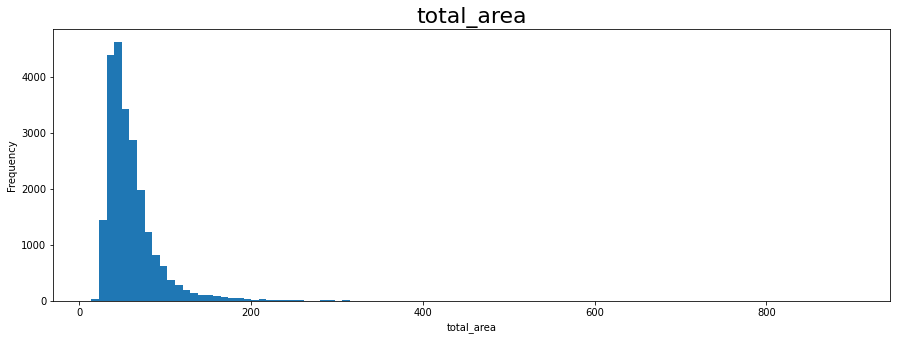

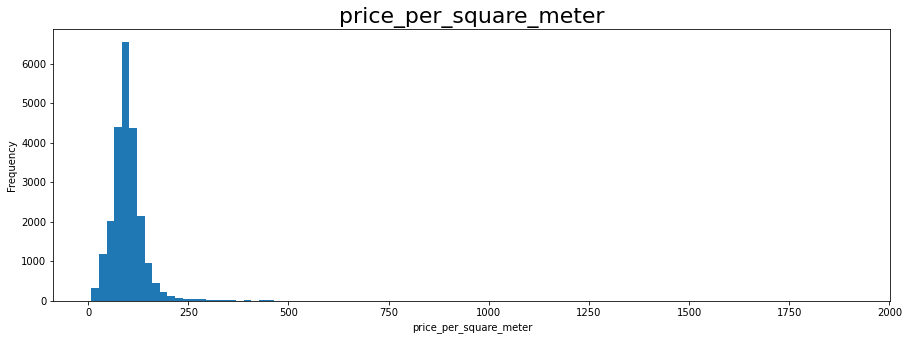

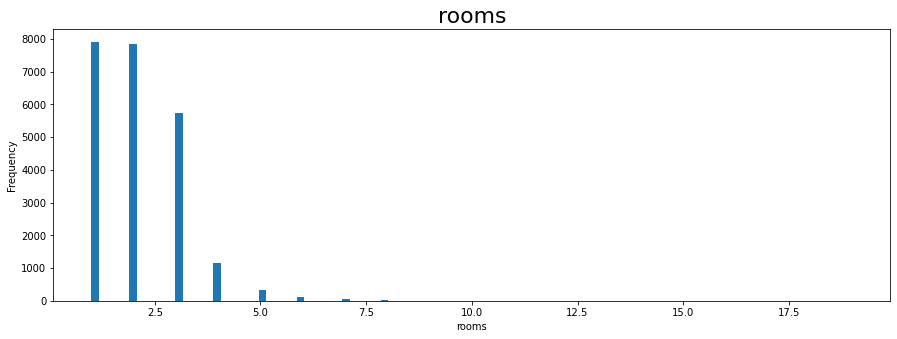

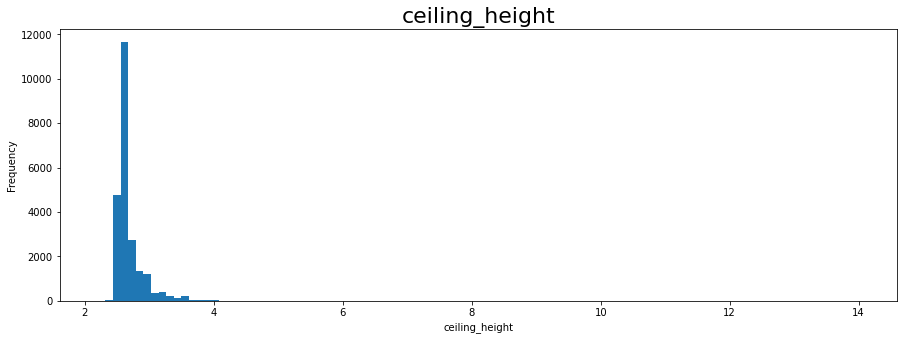

In [35]:
for col in ['total_area', 'price_per_square_meter', 'rooms','ceiling_height']: # создаём цикл для постороения гистрограмм
    df[col].plot(kind = 'hist', bins = 100,  figsize=(15,5))
    plt.title(col, fontsize=22)
    plt.xlabel(col)
    plt.show()

### Вывод

В изученных параметрах большие выбросы

* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [36]:
print('Среднее время:', df['days_exposition'].mean()) # выводим на экран среднее значение времени продажи квартиры
print('Медиана:', df['days_exposition'].median()) # выводим на экран медиану времени продажи квартиры

Среднее время: 181.87353337660392
Медиана: 96.0


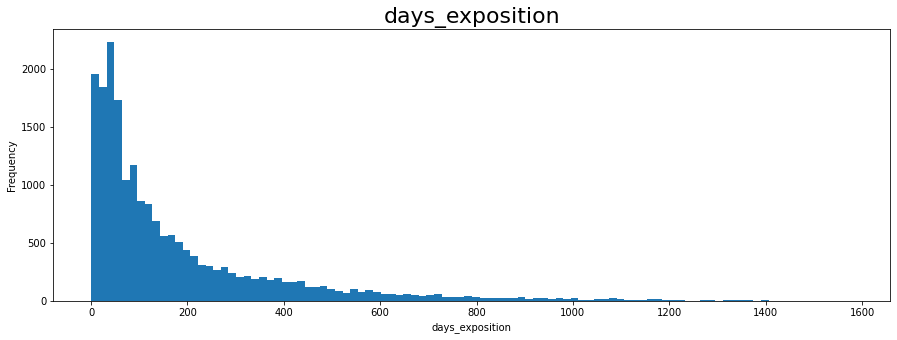

In [37]:
df['days_exposition'].plot(kind = 'hist', bins = 100, figsize=(15,5)) # строим гисторграмму
plt.title('days_exposition', fontsize=22)
plt.xlabel('days_exposition')
plt.show()

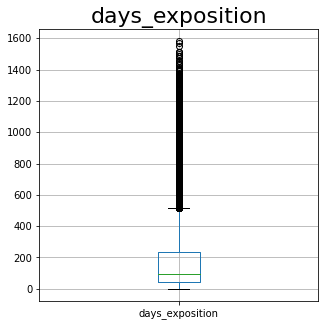

In [38]:
df.boxplot(column='days_exposition',  figsize=(5,5)) # строим график распределения данных
plt.title('days_exposition', fontsize=22)
plt.show()

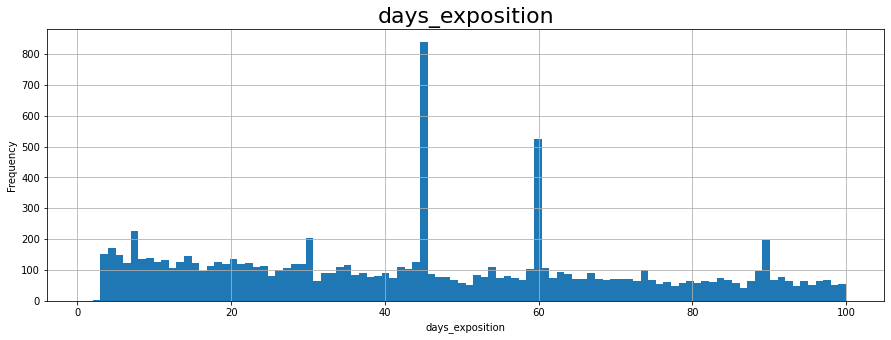

In [39]:
df['days_exposition'].plot(kind = 'hist', bins = 100, title ='days_exposition', grid = True, figsize=(15,5), range = (1,100)) # строим гисторграмму
plt.title('days_exposition', fontsize=22)
plt.xlabel('days_exposition')
plt.show()

In [40]:
df['days_exposition'].describe() # получение описательной статистики столбцу days_exposition

count    20029.000000
mean       181.873533
std        220.466078
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод

В ходе изучения времени продажи квартиры найдено среднее время 181 дней, медианное значение 96 дней. Обычно продажа квартиры занимает от 45 до 233 дней, всё что меньше 45 дней будем считать очень быстрой а выше 233 медленной продажей.

* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

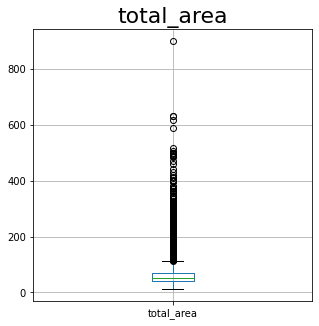

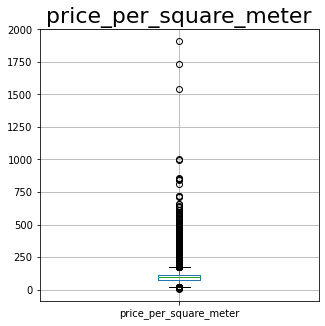

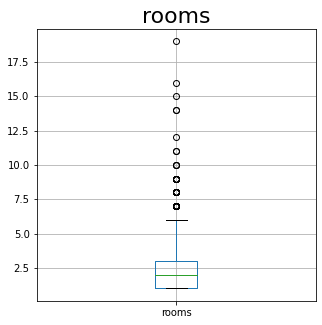

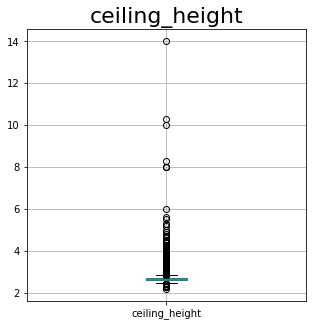

In [41]:
for col in ['total_area', 'price_per_square_meter', 'rooms','ceiling_height']: # создаём цикл для постороения графиков распределения данных
    df.boxplot(column=col,  figsize=(5,5))
    plt.title(col, fontsize=22)
    plt.show()

In [42]:
for col in ['total_area', 'price_per_square_meter', 'rooms','ceiling_height']: # создаём цикл убирающий редкие и выбивающиеся значения
    q1 = df[col].quantile(0.25) # считаем первый квартиль
    q3 = df[col].quantile(0.75) # считаем третий квартиль
    iqr = q3 - q1 # считаем межквартильный диапазон
    lowlvl = q1 - 1.5 * iqr # считаем нижний уровень
    toplvl = q3 + 1.5 * iqr # считаем верхний уровень      
    df = df.query(f'@lowlvl < {col} < @toplvl') # пересохраняем датафрейм с новыммы условиями

In [43]:
df.describe() # получение описательной статистики

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,month,year,living_ratio,kitchen_ratio
count,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,...,19161.000000,5565.000000,19161.000000,6620.000000,16897.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000
mean,9.745890,4814.467199,52.622210,1.913000,2.628651,11.236835,29.804658,6.103805,9.484579,0.621419,...,0.375346,504.266128,0.494129,539.033082,170.070249,91.453168,6.406033,2017.383435,0.558306,0.190752
std,5.560437,2340.369346,17.883354,0.863429,0.081744,6.641739,12.483846,4.981252,3.627622,0.958038,...,0.658988,338.308164,0.791513,276.733397,207.893877,27.572878,3.487250,1.016972,0.101496,0.068746
min,0.000000,630.000000,14.000000,1.000000,2.460000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,20.754717,1.000000,2014.000000,0.069588,0.043524
25%,6.000000,3300.000000,38.900000,1.000000,2.560000,5.000000,18.000000,2.000000,7.000000,0.000000,...,0.000000,304.000000,0.000000,327.000000,43.000000,74.375000,3.000000,2017.000000,0.488372,0.138044
50%,9.000000,4300.000000,48.200000,2.000000,2.650000,9.000000,29.000000,5.000000,9.000000,0.000000,...,0.000000,470.000000,0.000000,524.000000,90.000000,92.156863,6.000000,2017.000000,0.562500,0.177551
75%,14.000000,5750.000000,62.540000,3.000000,2.650000,16.000000,38.800000,8.000000,10.940000,1.000000,...,1.000000,627.000000,1.000000,751.000000,215.000000,108.626198,10.000000,2018.000000,0.630435,0.236066
max,50.000000,18000.000000,114.300000,5.000000,2.850000,52.000000,93.600000,33.000000,55.700000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,167.073171,12.000000,2019.000000,0.901675,0.724638


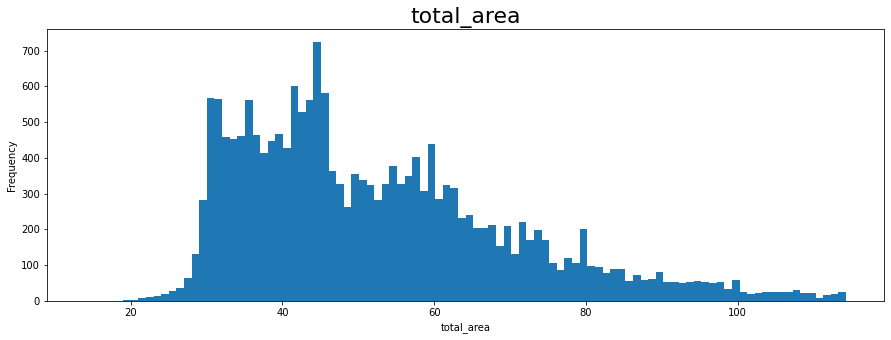

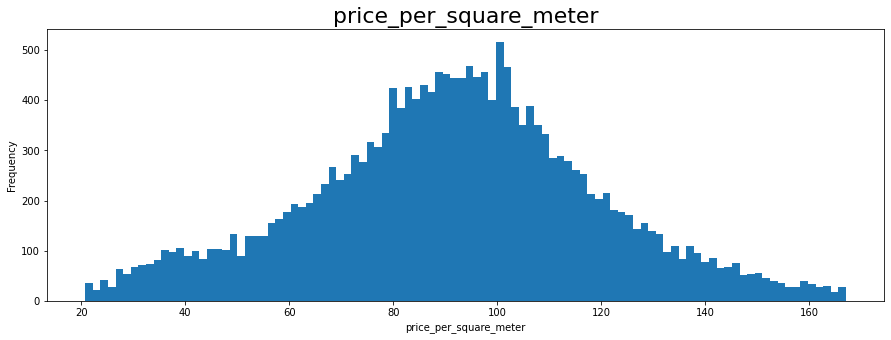

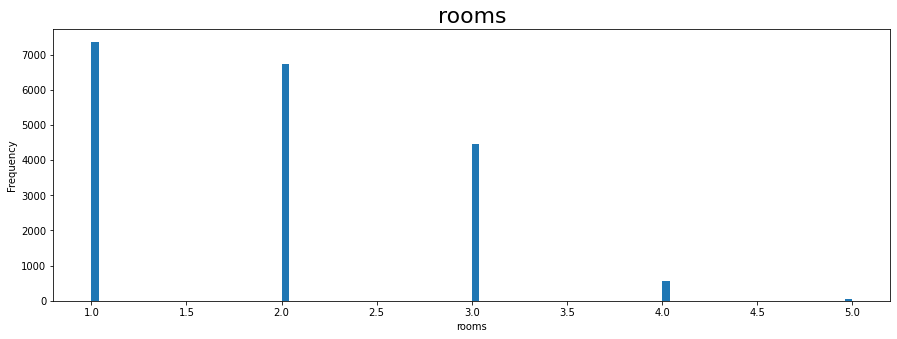

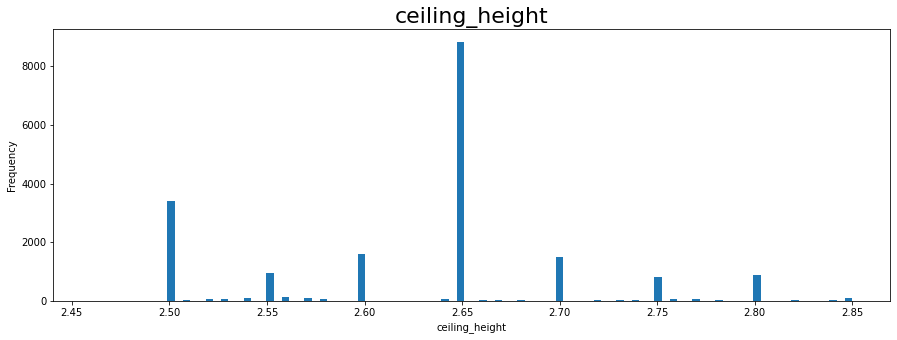

In [44]:
for col in ['total_area', 'price_per_square_meter', 'rooms','ceiling_height']: # создаём цикл для постороения гистрограмм
    df[col].plot(kind = 'hist', bins = 100, figsize=(15,5))
    plt.title(col, fontsize=22)
    plt.xlabel(col)
    plt.show()

### Вывод

Убераны редкие и выбивающиеся значения. Большинство квартир площадью до 60 м², средняя цена 91 тыс руб за м², больше всего продают однокомнатные и двухкомнатные квартиры, самая частая высота потолков 2.65 м.

* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [45]:
for col in ['total_area', 'rooms','city_centers_nearest']: # создаём цикл для посчёта корреляции
    print('Коррелция между', col, 'и', 'price_per_square_meter ровна', df[col].corr(df['price_per_square_meter']))
    

Коррелция между total_area и price_per_square_meter ровна 0.0040549178557346
Коррелция между rooms и price_per_square_meter ровна -0.1895620676752406
Коррелция между city_centers_nearest и price_per_square_meter ровна -0.18063272624238316


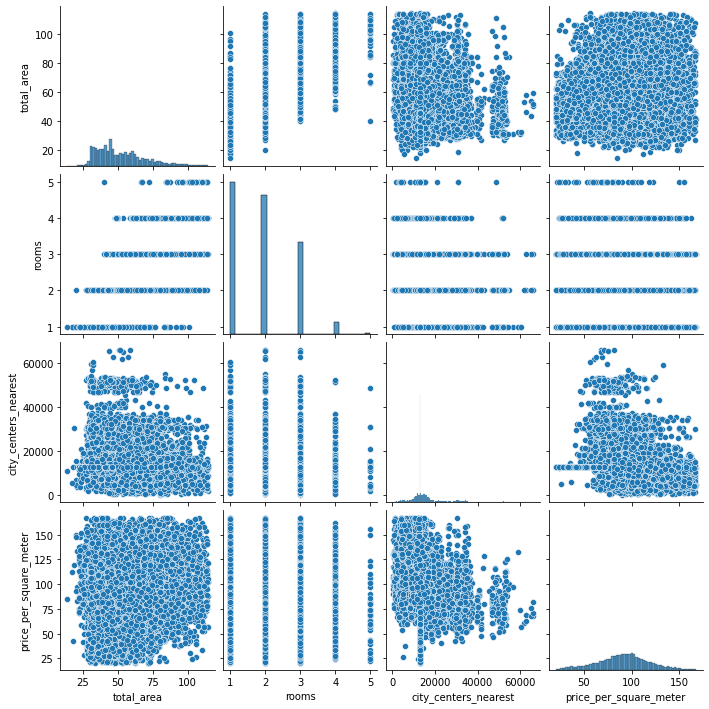

In [46]:
sns.pairplot(df[['total_area', 'rooms','city_centers_nearest', 'price_per_square_meter']])

<AxesSubplot:>

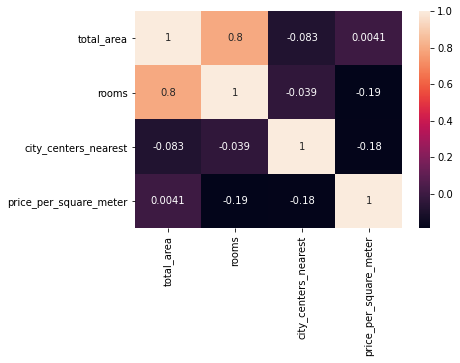

In [47]:
sns.heatmap(df[['total_area', 'rooms','city_centers_nearest', 'price_per_square_meter']].corr(), annot=True)

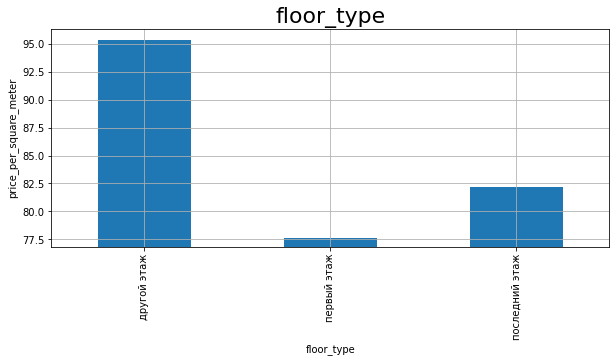

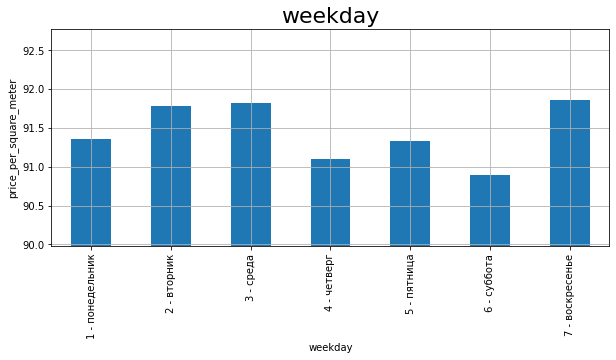

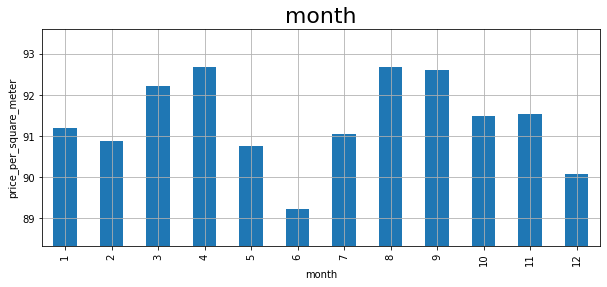

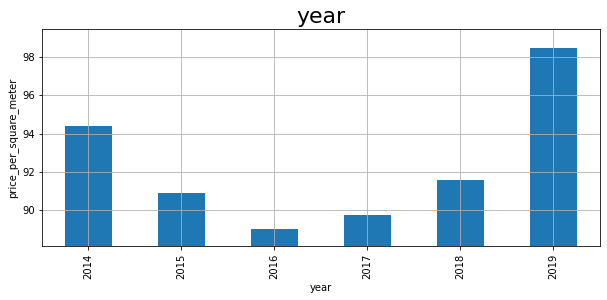

In [48]:
for col in ['floor_type', 'weekday', 'month', 'year']: # создаём цикл для построения столбчатых диаграмм
    df.groupby(col)['price_per_square_meter'].mean().plot(x=col, y="price_per_square_meter",ylim = ([
        df.groupby(col)['price_per_square_meter'].mean().min()*0.99, df.groupby(col)[
            'price_per_square_meter'].mean().max()*1.01]), kind='bar', figsize=(10,4), grid = True)
    plt.title(col, fontsize=22)
    plt.xlabel(col)
    plt.ylabel('price_per_square_meter')
    plt.show()


### Вывод

Зависимость цены квартиры за м² от общей площади отсутствует.Есть небольшая отрицательная корреляция цены квартиры за м² и количества комнат и расстояния до центра. Самые дешёвые квартиры на первом этаже. Зависимости от дня недели почти нет. В июне квартиры продают гораздо дешевле чем в другие месяцы. До 2016 года цена на недвижимость падала.

* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

,locality_name,price_per_square_meter
0,Санкт-Петербург,104.578303
1,Пушкин,100.788343
2,Кудрово,94.819669
3,Парголово,90.366194
4,Мурино,85.265121
5,Шушары,78.112658
6,Колпино,75.535918
7,Гатчина,68.991104
8,Всеволожск,67.008409
9,Выборг,57.450437


Самая высокая стоимость жилья в городе Санкт-Петербург
Самая низкая стоимость жилья в городе Выборг


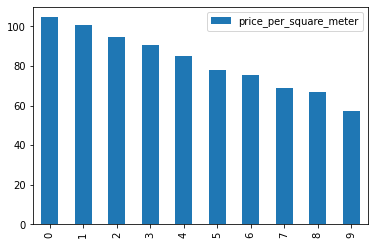

In [49]:

top = df[df['locality_name'].isin(df['locality_name'].value_counts().head(10).index.values)].groupby('locality_name').agg(
    {'price_per_square_meter': 'mean'}).sort_values(by = 'price_per_square_meter', ascending=False) # создаём датафрейм top


top.reset_index(inplace = True) # сбрасываем index
top.plot(kind = 'bar')
display(top) # выводим top на экран
print('Самая высокая стоимость жилья в городе', top.loc[0, 'locality_name']) # выводим на экран 0 строку top
print('Самая низкая стоимость жилья в городе', top.loc[9, 'locality_name']) # выводим на экран 9 строку top


### Вывод

Создан топ 10 населённых пунктов с наибольшим количеством объявлений. Самая высокая стоимость жилья в городе Санкт-Петербург. Самая низкая стоимость жилья в городе Выборг.

* Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [50]:
df['city_centers_nearest_km'] = (df['city_centers_nearest']/1000).astype('int') # создаём столбец city_centers_nearest_km

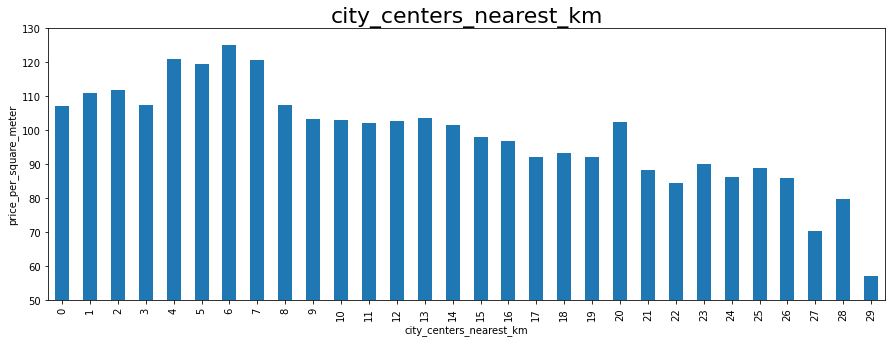

In [51]:
df.query('locality_name == "Санкт-Петербург"').groupby('city_centers_nearest_km')['price_per_square_meter'].median().plot(
    x='city_centers_nearest_km', y='price_per_square_meter', ylim = (50, 130), kind='bar', figsize=(15,5)) # строим столбчатую диаграмму зависимости цены квадратного метра от растояния до центра
plt.title('city_centers_nearest_km', fontsize=22)
plt.xlabel('city_centers_nearest_km')
plt.ylabel('price_per_square_meter')
plt.show()

### Вывод

Построен график зависимости цены от удалённости от центра. Центром будем считать територию радиусом до 8 км.

* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [52]:
df_center = df.query('city_centers_nearest_km < 8') # создаём датафрейм df_center
df_center[['total_area', 'price_per_square_meter', 'rooms', 'ceiling_height']].describe() # получение описательной статистики

,total_area,price_per_square_meter,rooms,ceiling_height
count,1455.000000,1455.000000,1455.000000,1455.000000
mean,65.085141,118.514427,2.233677,2.660811
std,21.985509,24.054252,0.913204,0.074086
min,17.000000,26.250000,1.000000,2.460000
25%,46.000000,100.000000,2.000000,2.650000
50%,62.200000,117.699115,2.000000,2.650000
75%,82.175000,137.635517,3.000000,2.650000
max,114.200000,167.073171,5.000000,2.850000


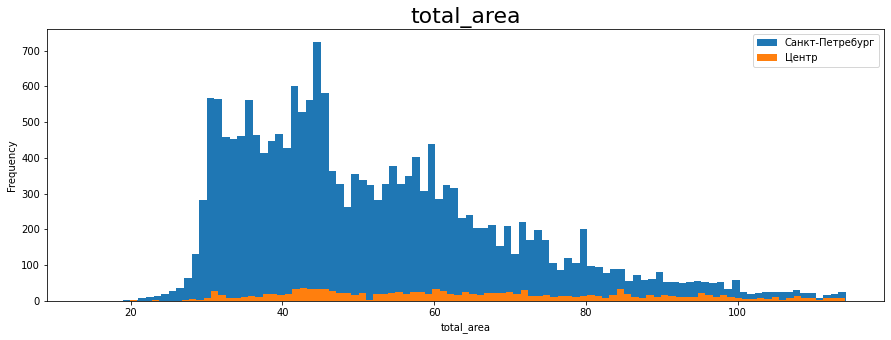

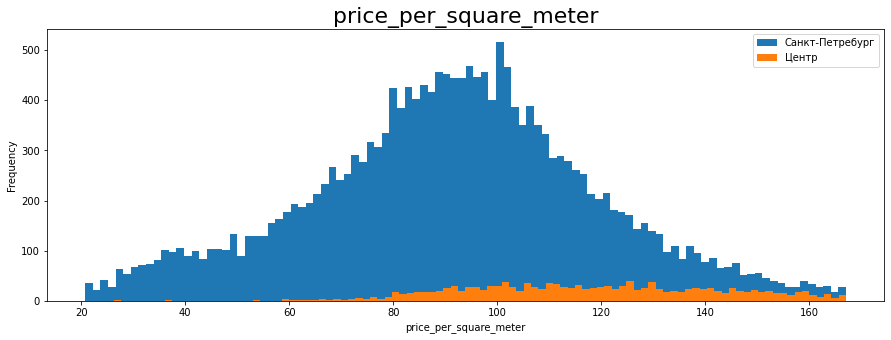

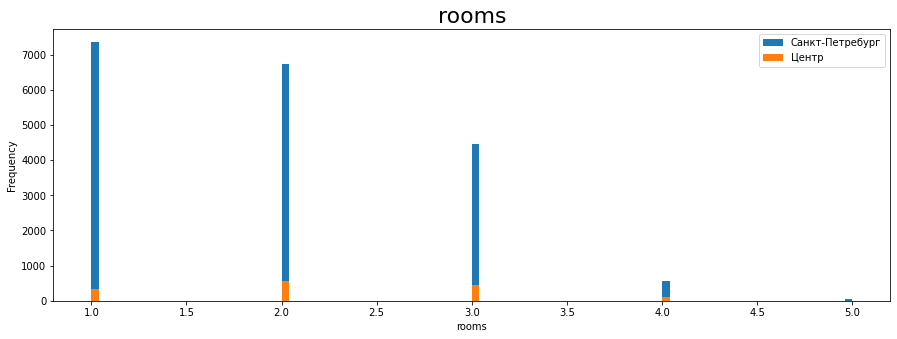

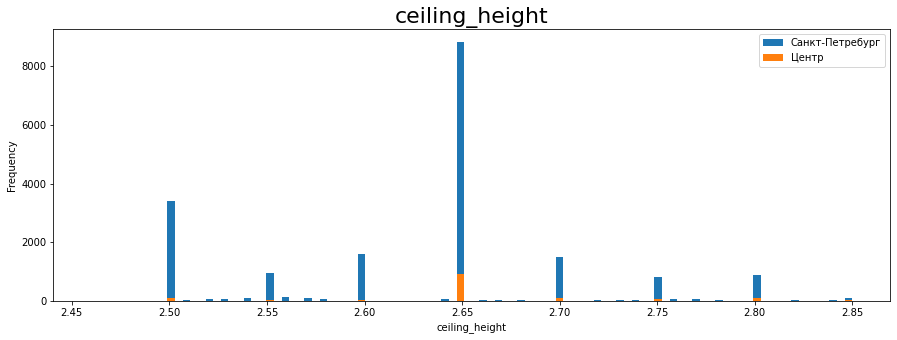

In [53]:
for col in ['total_area', 'price_per_square_meter', 'rooms','ceiling_height']: # создаём цикл для постороения гистрограмм
    df[col].plot(kind = 'hist', bins = 100, title =col, legend = True, figsize=(15,5), label = 'Санкт-Петребург')
    df_center[col].plot(kind = 'hist', bins = 100, title =col, legend = True, figsize=(15,5), label = 'Центр')
    plt.title(col, fontsize=22)
    plt.xlabel(col)
    plt.show()

In [54]:
for col in ['total_area', 'rooms','city_centers_nearest']: # создаём цикл для посчёта корреляции
    print('Коррелция между', col, 'и', 'price_per_square_meter ровна', df_center[col].corr(df_center['price_per_square_meter']))

Коррелция между total_area и price_per_square_meter ровна -0.19013888244648597
Коррелция между rooms и price_per_square_meter ровна -0.36141459374031093
Коррелция между city_centers_nearest и price_per_square_meter ровна 0.10708237906039278


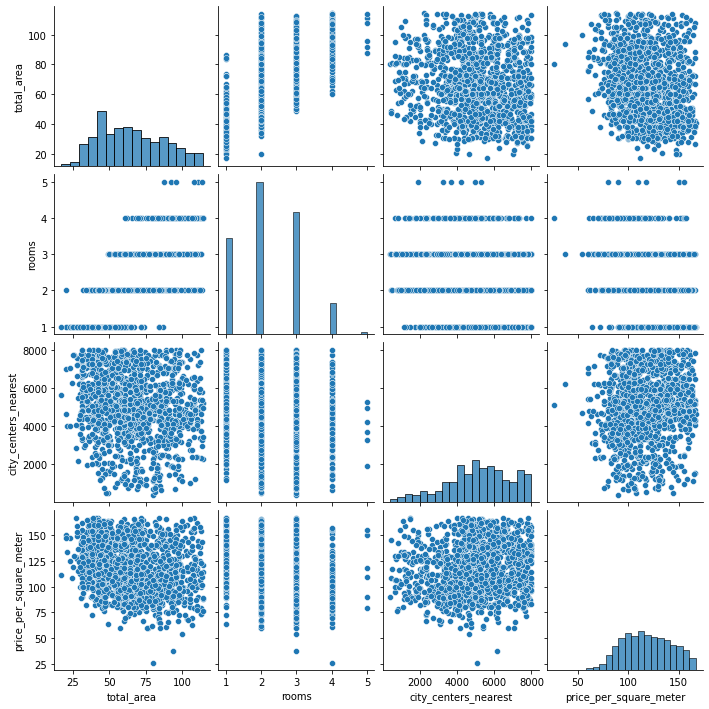

In [55]:
sns.pairplot(df_center[['total_area', 'rooms','city_centers_nearest', 'price_per_square_meter']])

<AxesSubplot:>

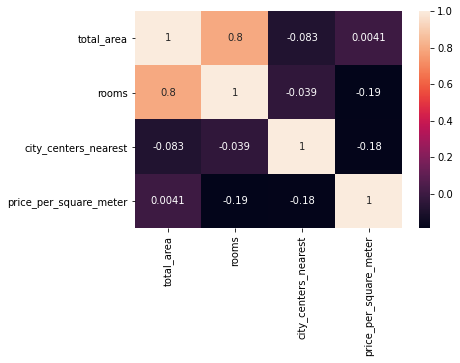

In [56]:
sns.heatmap(df[['total_area', 'rooms','city_centers_nearest',  'price_per_square_meter']].corr(), annot=True)

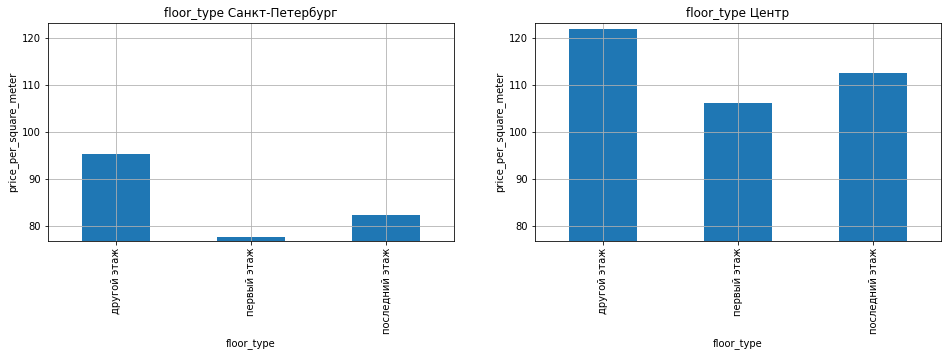

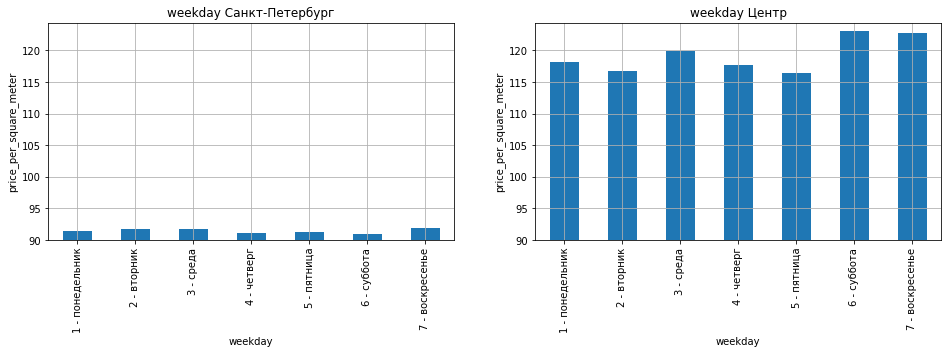

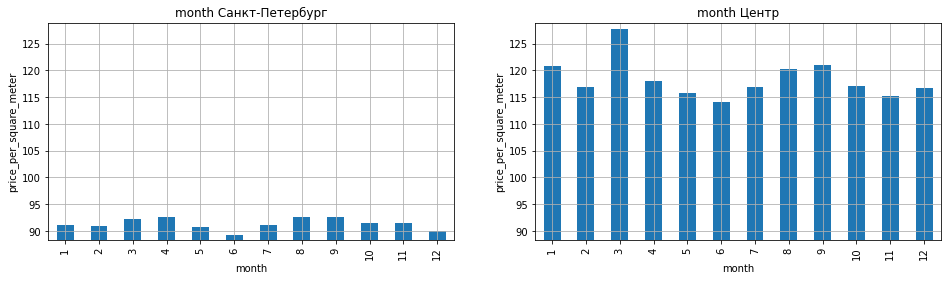

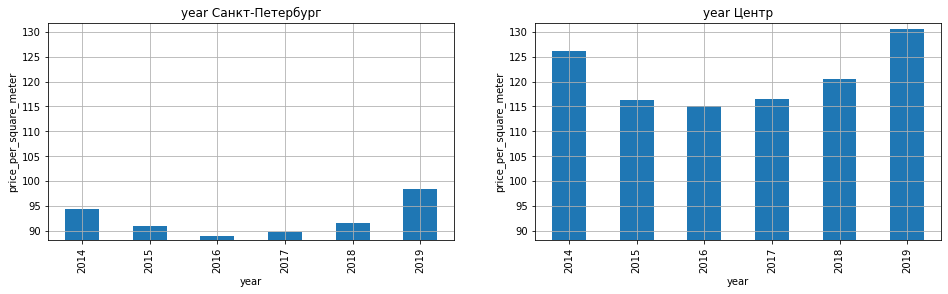

In [57]:
for col in ['floor_type', 'weekday', 'month', 'year']: # создаём цикл для построения столбчатых диаграмм
    plt.subplot(121)    
    plt.title(col + ' Санкт-Петербург')   
    plt.xlabel(col)
    plt.ylabel('price_per_square_meter')    
    df.groupby(col)['price_per_square_meter'].mean().plot(x=col, y="price_per_square_meter",ylim = (
        [df.groupby(col)['price_per_square_meter'].mean().min()*0.99, df_center.groupby(col)[
            'price_per_square_meter'].mean().max()*1.01]), kind='bar', figsize=(16,4), grid = True)    
    plt.subplot(122)
    plt.title(col + ' Центр')    
    plt.xlabel(col)
    plt.ylabel('price_per_square_meter')    
    df_center.groupby(col)['price_per_square_meter'].mean().plot(x=col, y="price_per_square_meter",ylim = (
        [df.groupby(col)['price_per_square_meter'].mean().min()*0.99, df_center.groupby(col)[
            'price_per_square_meter'].mean().max()*1.01]), kind='bar', figsize=(16,4), grid = True)
    plt.show()

### Вывод

Зависимость цены квартиры за м² от общей площади отсутствует.Есть небольшая, но больше чем по всему Санкт-Петербургу отрицательная корреляция цены квартиры за м² и количества комнат. В отличии от Санкт-Петербурга в центре положительная корреляция цены квартиры за м² от растояния до центра. Самые дешёвые квартиры на первом этаже. Зависимости от дня недели почти нет. В июне квартиры продают гораздо дешевле чем в другие месяцы. До 2016 года цена на недвижимость падала. Цены в центре дороже чем по всему Санкт-Петербургу.

## Шаг 5. Общий вывод

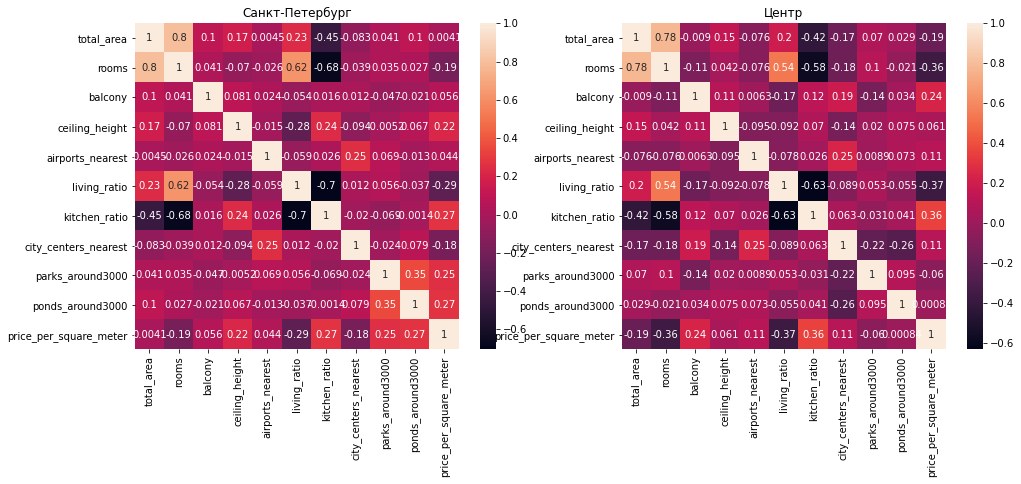

In [58]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Санкт-Петербург')
sns.heatmap(df[['total_area', 'rooms', 'balcony', 'ceiling_height', 'airports_nearest' , 'living_ratio', 
                'kitchen_ratio', 'city_centers_nearest', 'parks_around3000', 'ponds_around3000', 'price_per_square_meter']].corr(), annot=True)

plt.subplot(122)
plt.title('Центр')
sns.heatmap(df_center[['total_area', 'rooms', 'balcony', 'ceiling_height', 'airports_nearest' , 'living_ratio', 
                       'kitchen_ratio', 'city_centers_nearest', 'parks_around3000', 'ponds_around3000', 'price_per_square_meter']].corr(), annot=True)

plt.show()

В проекте был изучен файл real_estate_data.csv. Предобарботаны данные, заполнены пропуски. Посчитаны и добавлены новые данные в таблицу. Проведен исследовательский анализ данных. Параметры влияющие на цену квартиры:
1. Количество комнат, зависимость прослеживается только в центре, чем меньше комнат тем выше цена за квадратный метр.
2. Количество балконов, зависимость прослеживается только в центре, чем больше тем выше цена за квадратный метр.
3. Высота потолков, чем выше потолки тем выше стоимость, но в центре эта зависимость почти не наблюдается.
4. От наличия парков и водоёмов зависит цена квартиры, но в центре такой зависимости нет.
5. Отношение площади кухни к общей, зависимость прослеживается по всему городу, в центре зависимость больше.
6. Отношение жилой площади к общей, в этом случае наблюдается обратная зависимость, чем меньше отношение тем выше цена.